**Imports and workspace setting**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
plt.style.use('ggplot')

**Loading data file**

In [63]:
cancerData = pd.read_csv('../data/breast-cancer-wisconsin.data', header=None)
cancerData.drop(cancerData.columns[0],axis=1,inplace=True)
cancerData = cancerData.replace('?', np.nan)
cancerData.head()

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


**Stats of the data**

In [64]:
cancerData.shape

(699, 10)

**Class distribution of benign (2) and malignant (4)**

Class distribution is skewed towards benign.

Text(0.5, 0, 'Class')

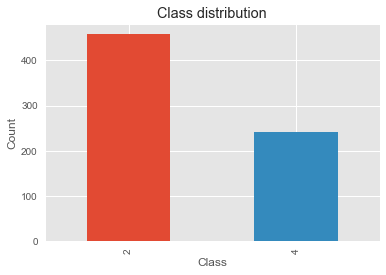

In [66]:
fig, ax = plt.subplots(figsize=(6,4))
axes = cancerData[10].value_counts().plot(kind='bar', title='Class distribution')
axes.set_ylabel('Count')
axes.set_xlabel('Class')

**Drop missing values (16 values with ? mark)**

In [67]:
cancerDataAfterMissingValuesDropped = cancerData.dropna()
cancerDataAfterMissingValuesDropped.shape

(683, 10)

In [68]:
y = cancerDataAfterMissingValuesDropped.values[:,-1]
y=y.astype('int')
y.shape

(683,)

In [69]:
X = cancerDataAfterMissingValuesDropped.values[:,:-1]
X=X.astype('int')
X.shape

(683, 9)

**Holdout to create training (65%) and testing (35%) dataset**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=8)
print (str(X_train.shape) +","+ str(y_train.shape))
print (str(X_test.shape) +","+ str(y_test.shape))

(443, 9),(443,)
(240, 9),(240,)


**Fit Logistic regression model**

In [71]:
logreg = LogisticRegression(solver='lbfgs', class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [72]:
predictions = logreg.predict(X_test)

In [73]:
score = logreg.score(X_test, y_test)
print('Accuracy score = ', score)

Accuracy score =  0.975


**Classification report**

In [74]:
target_names = ['2 (benign)', '4 (malignant)']
print(metrics.classification_report(y_test,predictions, target_names=target_names, digits=3))

               precision    recall  f1-score   support

   2 (benign)      0.980     0.980     0.980       147
4 (malignant)      0.968     0.968     0.968        93

    micro avg      0.975     0.975     0.975       240
    macro avg      0.974     0.974     0.974       240
 weighted avg      0.975     0.975     0.975       240



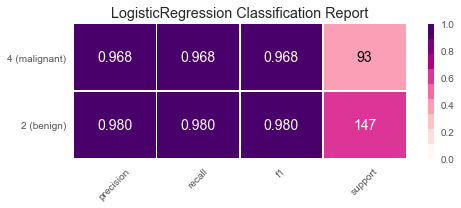

In [75]:
fig, ax = plt.subplots(figsize=(7,3))
visualizer = ClassificationReport(logreg, classes=target_names, support=True, cmap='RdPu')
visualizer.score(X_test, y_test)
for label in visualizer.ax.texts:
    label.set_size(14)
g = visualizer.poof()

**Confusion metrix**

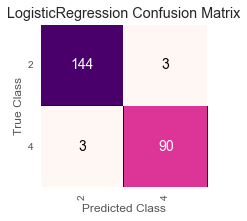

In [76]:
fig, ax = plt.subplots(figsize=(3,3))
cm = ConfusionMatrix(logreg, classes=[2,4], cmap='RdPu')
cm.score(X_test, y_test)
for label in cm.ax.texts:
    label.set_size(14)
cm.poof()

**Replace the missing values with 1 in original dataset**

In [77]:
cancerData.shape ## Original dataset

(699, 10)

In [78]:
cancerDataReplacedMissingWith1 = cancerData.fillna(1)  ## Fill NaNs with 1
cancerDataReplacedMissingWith1.head()

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [79]:
y = cancerDataReplacedMissingWith1.values[:,-1]
y=y.astype('int')

X = cancerDataReplacedMissingWith1.values[:,:-1]
X=X.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=8)
print (str(X_train.shape) +","+ str(y_train.shape))
print (str(X_test.shape) +","+ str(y_test.shape))

logreg = LogisticRegression(solver='lbfgs', class_weight='balanced')
logreg.fit(X_train, y_train)

(454, 9),(454,)
(245, 9),(245,)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [80]:
predictions = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print('Accuracy score = ', score)

Accuracy score =  0.9673469387755103


In [81]:
target_names = ['2 (benign)', '4 (malignant)']
print(metrics.classification_report(y_test,predictions, target_names=target_names, digits=3))

               precision    recall  f1-score   support

   2 (benign)      0.970     0.982     0.976       164
4 (malignant)      0.962     0.938     0.950        81

    micro avg      0.967     0.967     0.967       245
    macro avg      0.966     0.960     0.963       245
 weighted avg      0.967     0.967     0.967       245



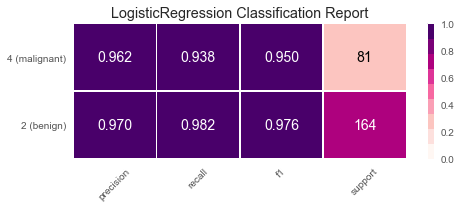

In [82]:
fig, ax = plt.subplots(figsize=(7,3))
visualizer = ClassificationReport(logreg, classes=target_names, support=True, cmap='RdPu')
visualizer.score(X_test, y_test)
for label in visualizer.ax.texts:
    label.set_size(14)
g = visualizer.poof()

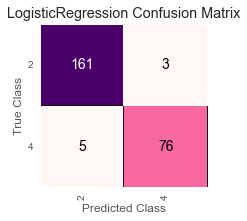

In [83]:
fig, ax = plt.subplots(figsize=(3,3))
cm = ConfusionMatrix(logreg, classes=[2,4], cmap='RdPu')
cm.score(X_test, y_test)
for label in cm.ax.texts:
    label.set_size(14)
cm.poof()

**Conclusion**
01. Model works really well and provides 97.5% and 96.7% for 2 missing value handling methods.
02. Adjesting probability thresholds using class_weight='balanced' were done to resolve the class skewness problem. Skewed class problem is seen in most practical scenarios.
03. random_state variable in train_test_split affects the score of the model since this is a small dataset and hence training/ testing data split has an impact to the results.